# 5. Exercises

## 5.1 Play with the distances and densities

### 1. Using Python, write a program to plot the Hubble function depending on the redshift (up to z=1) for the values $\Omega_m = 0.3$, $\Omega_\lambda = 0.7$, $\Omega_R = 0 $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Defining our three omegas
omega_mass = 0.3 
omega_lambda= 0.7
omega_radiation = 0

lightspeed_kms = 299792                        # Lightspeed (km/s)
hubble_0 = 70                                  # Hubble parameter for z=0 (km/s/Mpc)

#z = np.random.rand(100)
#z = np.arange(0,1,0.01)
z = np.arange(0,3.01,0.01)

In [3]:
def hubble_function(z):
    return hubble_0 * np.sqrt( omega_mass*(1+z)**3 + omega_radiation*(1+z)**4 + omega_lambda)

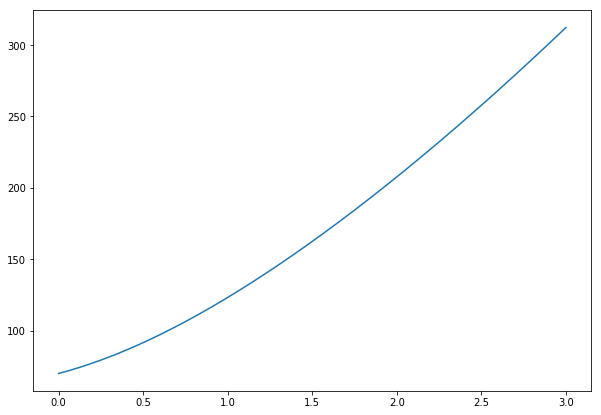

In [10]:
plt.figure(figsize = (10,7))
plt.plot(z,hubble_function(z))
plt.show()

### 2. Using this result, calculate the comoving distance $\chi(z)$, the luminosity distance $D_L(z)$ and the angular distance $D_A(z)$ for redshift between 0 and 1 with a step $\Delta(z) = 0.01$ . Plot the 3 curves on a same figure

In [5]:
from scipy import integrate

In [6]:
hubble_distance = lightspeed_kms / hubble_0    # Hubble Distance (Mpc)

def distance_integrand(z):
    return 1. / np.sqrt(omega_mass * (1. + z)**3 + omega_radiation*(1+z)**4 + omega_lambda)

In [11]:
#comoving_distance = np.zeros(len(z))
luminosity_distance = np.zeros(len(z))
angular_distance = np.zeros(len(z))

#for i in range (len(z)):
#k    comoving_distance[i] = hubble_distance * integrate.quad(distance_integrand, 0, z[i])[0]
for i in range (len(z)):
    luminosity_distance[i] = hubble_distance * (1 + z[i]) * integrate.quad(distance_integrand, 0, z[i])[0]
for i in range (len(z)):
    angular_distance[i] = hubble_distance * 1./(1 + z[i]) * integrate.quad(distance_integrand, 0, z[i])[0]
    
#comoving_distance = []

for i in range(len(z)):
    np.append(comoving_distance, hubble_distance * integrate.quad(distance_integrand, 0, z[i])[0])

### 3. Once it works, do the same for redshift up to 3. What do you remark for the angular distance? 

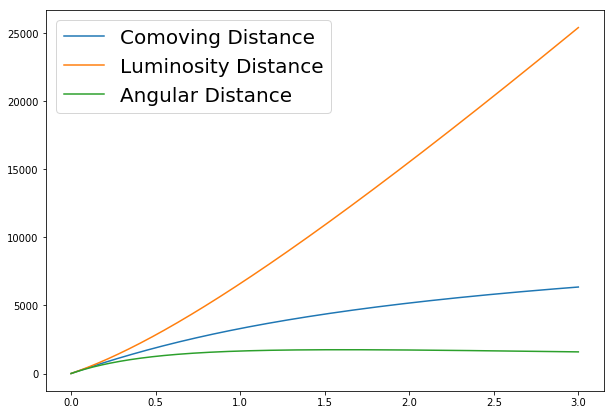

In [13]:
plt.figure(figsize = (10,7))
plt.plot(z, comoving_distance, label='Comoving Distance')
plt.plot(z, luminosity_distance, label='Luminosity Distance')
plt.plot(z, angular_distance, label='Angular Distance')
plt.legend(fontsize=20, loc=2)
plt.show()

## 5.2 Play with the data 

### 1. Using the notebook examples (using astro_query.sdss method), get the magnitudes in u,g,r,i and z band of SDSS for red galaxies. We want to get the spectroscopic redshift for these objects too. We will use a radius of 40 arcminutes in order to have enough galaxies.

In [9]:
from astroquery.sdss import SDSS      
from astropy import coordinates as coords
import astropy.units as u
from astropy.io import fits

/usr/lib/python2.7/dist-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


### 2. Using the "idlsave" package, read the model magnitudes for $z_f = 0.7$ and $z_f = 0.5$ and plot the colors $g-u$, $g-r$, $g-i$, and $g-z$ for redshift between 0 and 1. 

### 3. Overplot the colors of the galaxies you get for the red galaxies for the 2 different models.